In [1]:
import os
import sys
#sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_train
from autoencoder import network
from autoencoder import utils

/home/cjw/anaconda3/envs/deep/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#datadir = "/v/Data/cyto/ChannelOne/"
datadir = "/media/cjw/Data/cyto/mmCompensatedTifs"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/media/cjw/Data/cyto/mmCompensatedTifs/Fish3_CCB.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish4_ICE.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish3_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish6_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish2_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish1_Ice.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish5_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish6_ICE.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish4_CCB.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish6_CCB.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish2_CCB.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish1_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish4_Untreated.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish2_ICE.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish5_CCB.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish3_ICE.mm', '/media/cjw/Data/cyto/mmCompensatedTifs/Fish1_CCB.mm', '/media/cjw/Data/cyto/mmComp

dict_keys(['Fish3_CCB.mm', 'Fish4_ICE.mm', 'Fish3_Untreated.mm', 'Fish6_Untreated.mm', 'Fish2_Untreated.mm', 'Fish1_Ice.mm', 'Fish5_Untreated.mm', 'Fish6_ICE.mm', 'Fish4_CCB.mm', 'Fish6_CCB.mm', 'Fish2_CCB.mm', 'Fish1_Untreated.mm', 'Fish4_Untreated.mm', 'Fish2_ICE.mm', 'Fish5_CCB.mm', 'Fish3_ICE.mm', 'Fish1_CCB.mm', 'Fish5_ICE.mm'])

In [3]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


Encoder True
Tensor("Placeholder:0", shape=(?, 32, 32, 1), dtype=float32) (?, 32, 32, 1)
isize:  4 32
dh0 (?, 32, 32, 1)
180000 1406 128
Epoch:  0 Iteration:  0 Loss:  247.2252 245.36844 1.8567698


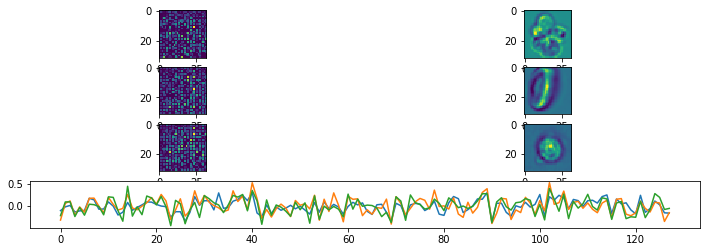

Epoch:  0 Iteration:  1000 Loss:  4.4632845 4.229615 0.2336691


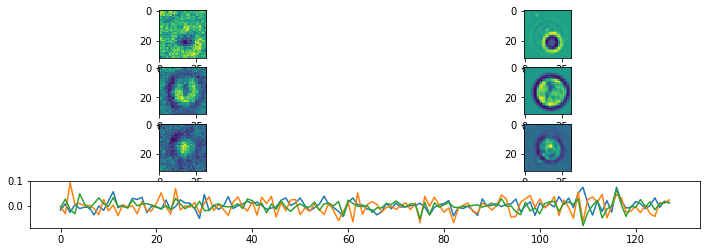

Epoch:  1 Iteration:  0 Loss:  3.7536685 3.537962 0.21570653


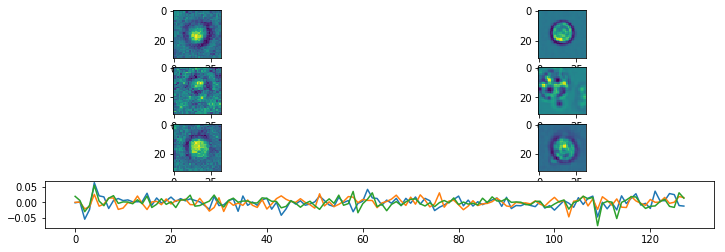

Epoch:  1 Iteration:  1000 Loss:  2.517245 2.3349001 0.18234488


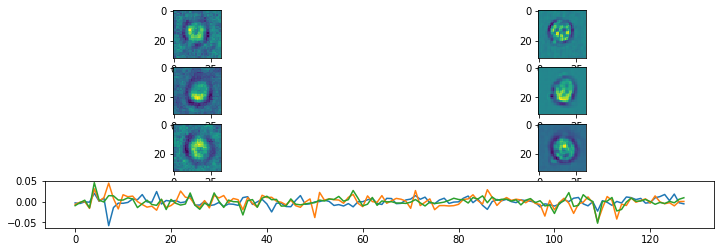

Epoch:  2 Iteration:  0 Loss:  2.289154 2.1118207 0.17733334


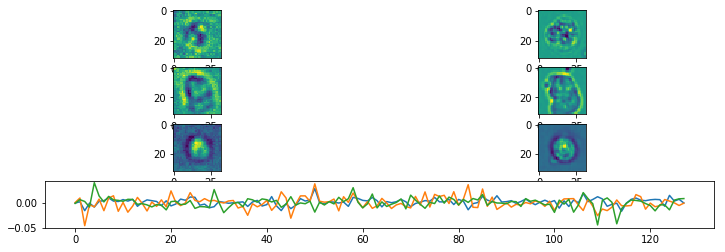

Epoch:  2 Iteration:  1000 Loss:  1.8153524 1.6652896 0.15006275


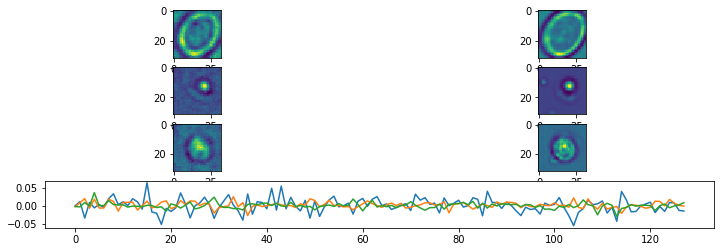

Epoch:  3 Iteration:  0 Loss:  1.6779886 1.5337319 0.14425671


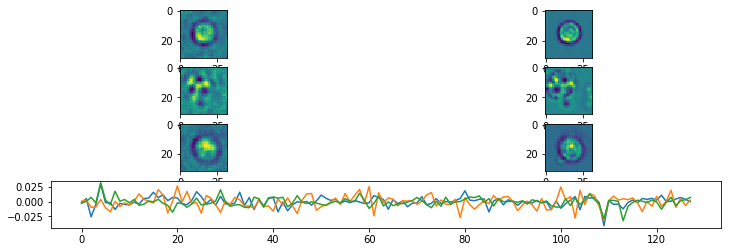

Epoch:  3 Iteration:  1000 Loss:  1.409013 1.2840483 0.12496476


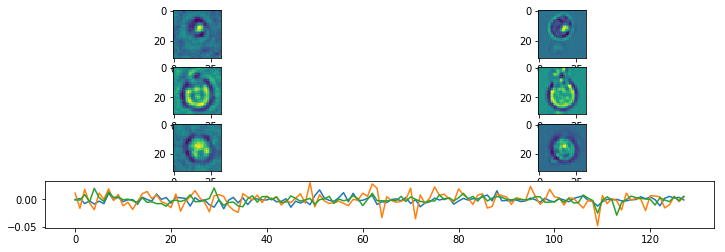

Epoch:  4 Iteration:  0 Loss:  1.3259017 1.2024093 0.123492435


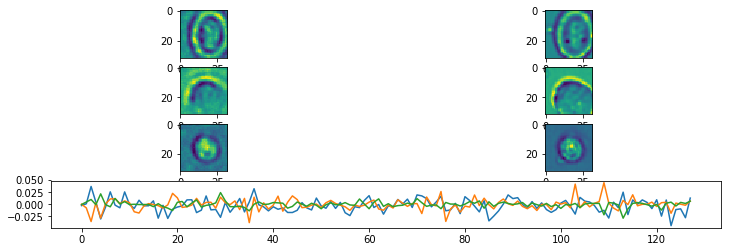

Epoch:  4 Iteration:  1000 Loss:  1.132009 1.0247241 0.1072849


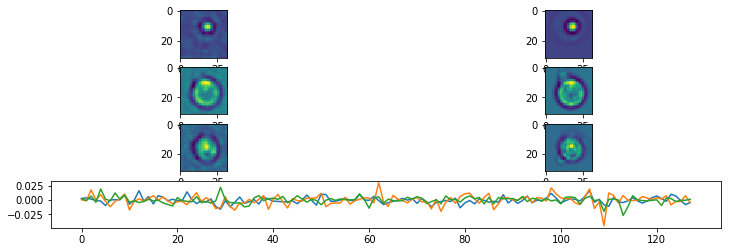

Epoch:  5 Iteration:  0 Loss:  1.0934881 0.99018663 0.10330142


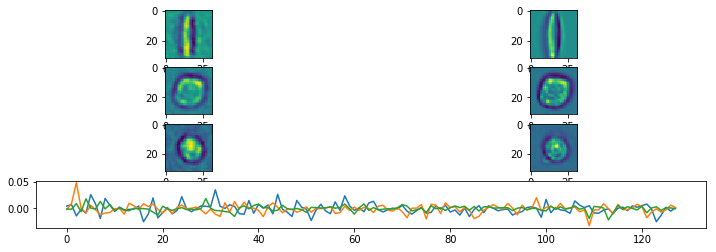

Epoch:  5 Iteration:  1000 Loss:  0.95553774 0.8674646 0.08807312


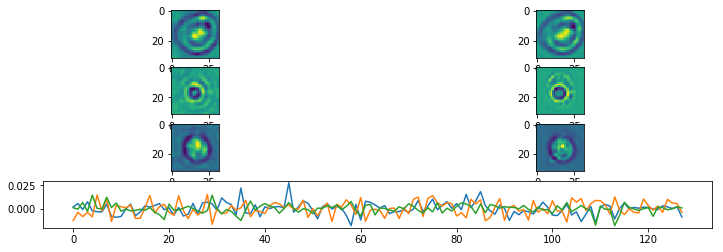

Epoch:  6 Iteration:  0 Loss:  0.93092614 0.8427526 0.08817359


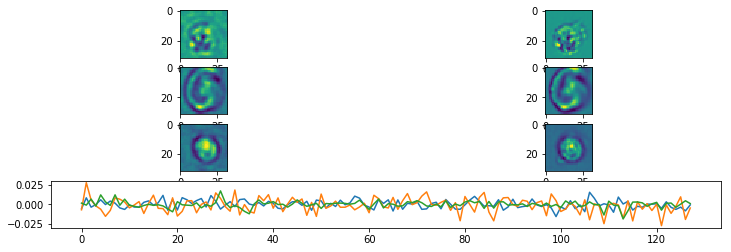

Epoch:  6 Iteration:  1000 Loss:  0.82676077 0.7491304 0.07763035


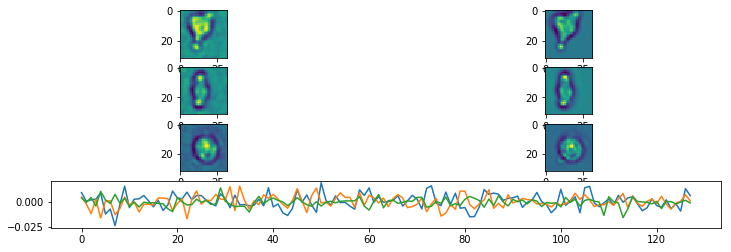

Epoch:  7 Iteration:  0 Loss:  0.8161311 0.73991454 0.076216556


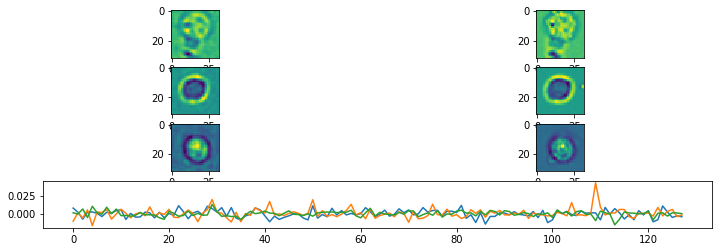

Epoch:  7 Iteration:  1000 Loss:  0.7315695 0.66381174 0.067757756


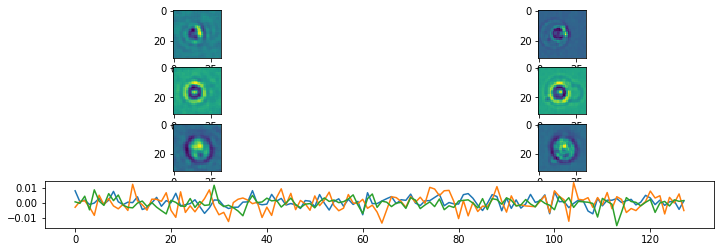

Epoch:  8 Iteration:  0 Loss:  1.0047287 0.84697086 0.15775786


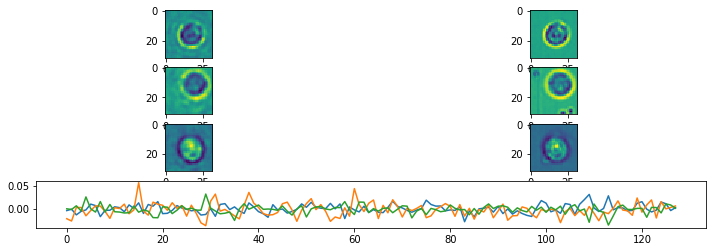

Epoch:  8 Iteration:  1000 Loss:  0.73366284 0.6460358 0.087627046


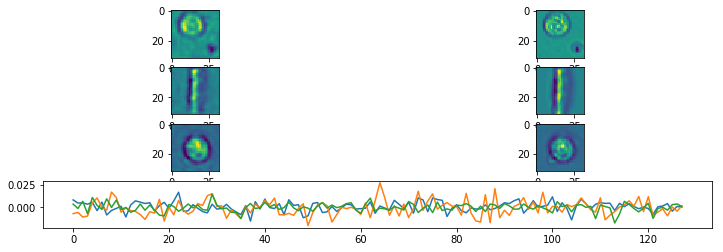

Epoch:  9 Iteration:  0 Loss:  0.73455 0.6536806 0.080869384


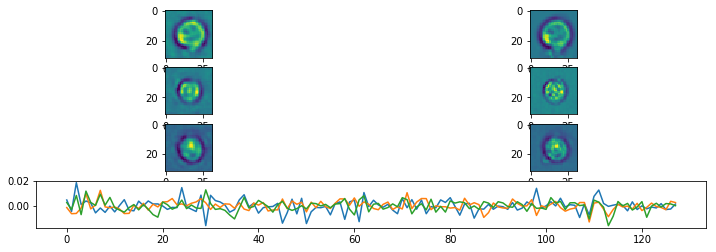

Epoch:  9 Iteration:  1000 Loss:  0.6737211 0.60592234 0.067798726


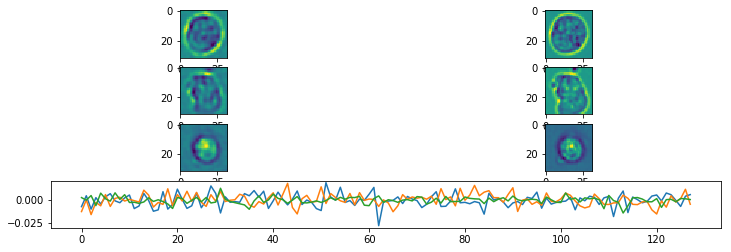

Epoch:  10 Iteration:  0 Loss:  0.68063116 0.6144142 0.066216975


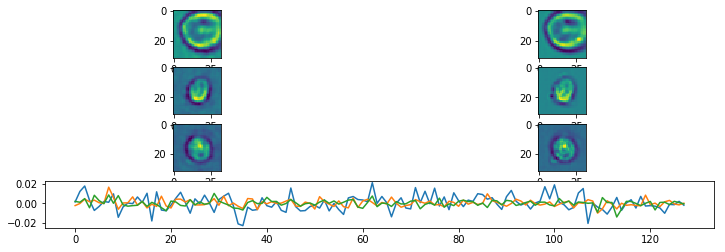

Epoch:  10 Iteration:  1000 Loss:  0.6414697 0.5830873 0.05838239


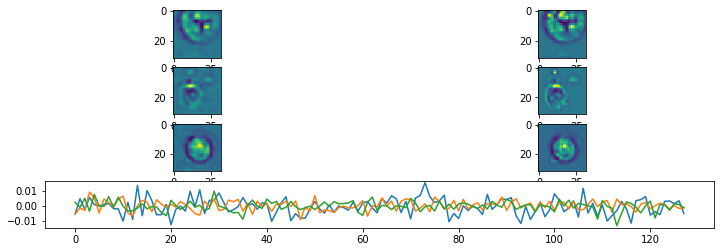

Epoch:  11 Iteration:  0 Loss:  0.65259266 0.5941678 0.0584248


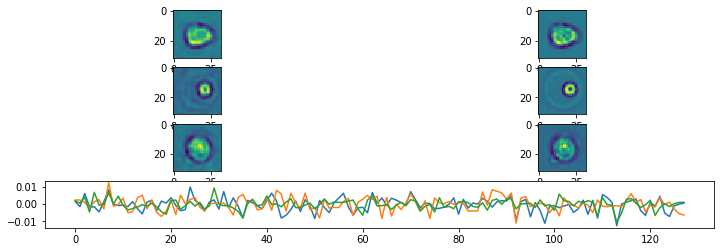

Epoch:  11 Iteration:  1000 Loss:  0.60587156 0.55363035 0.0522412


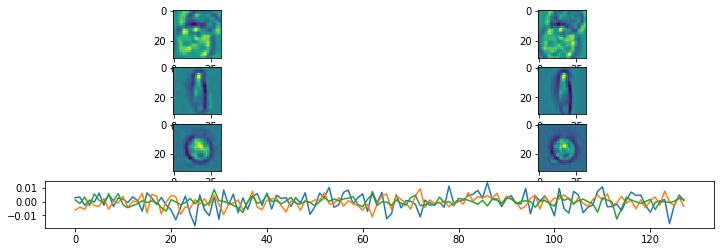

Epoch:  12 Iteration:  0 Loss:  0.7823132 0.66830754 0.11400567


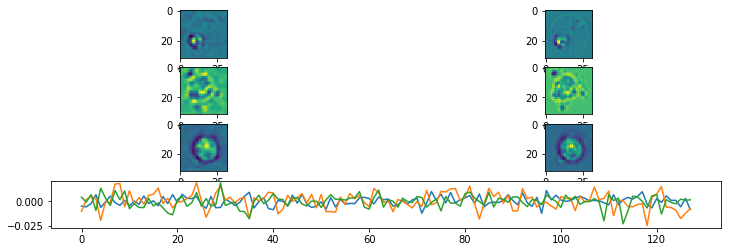

Epoch:  12 Iteration:  1000 Loss:  0.63130766 0.5589684 0.07233926


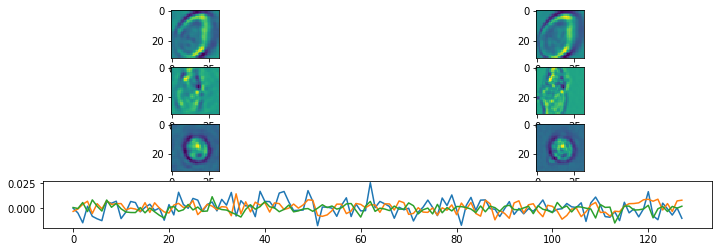

Epoch:  13 Iteration:  0 Loss:  0.6412123 0.57462084 0.066591464


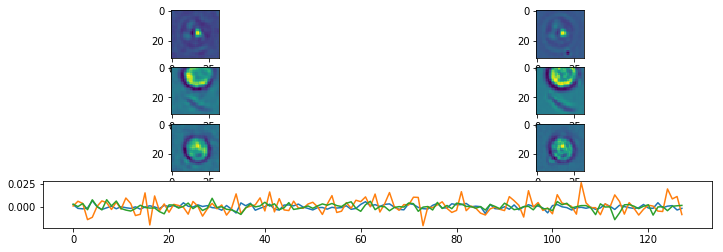

Epoch:  13 Iteration:  1000 Loss:  0.5997671 0.5427115 0.057055615


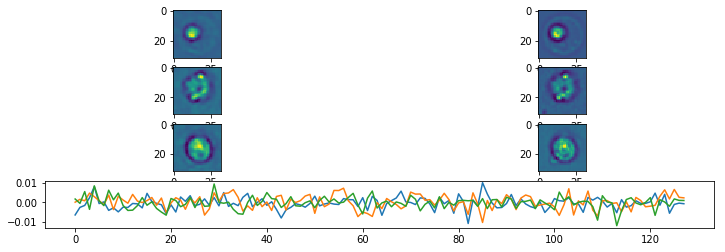

Epoch:  14 Iteration:  0 Loss:  0.60402006 0.5464925 0.057527523


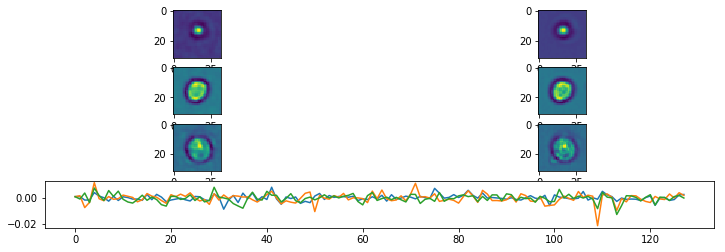

Epoch:  14 Iteration:  1000 Loss:  0.57846326 0.5253301 0.053133126


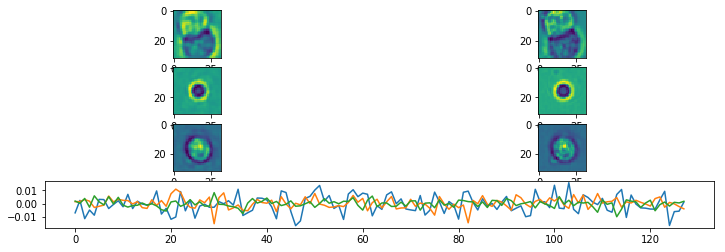

Epoch:  15 Iteration:  0 Loss:  0.5910561 0.5378375 0.053218607


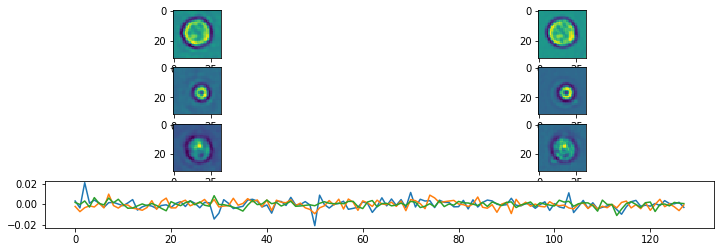

Epoch:  15 Iteration:  1000 Loss:  0.55773306 0.5089787 0.04875432


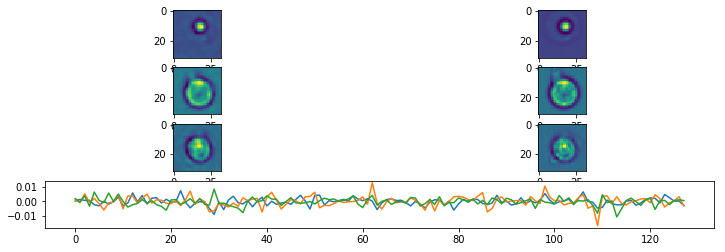

Epoch:  16 Iteration:  0 Loss:  0.57209945 0.5237468 0.048352655


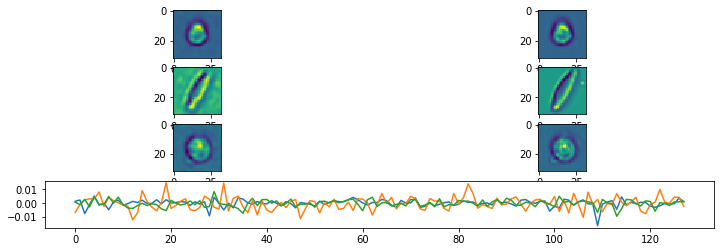

Epoch:  16 Iteration:  1000 Loss:  0.82972723 0.7143061 0.11542112


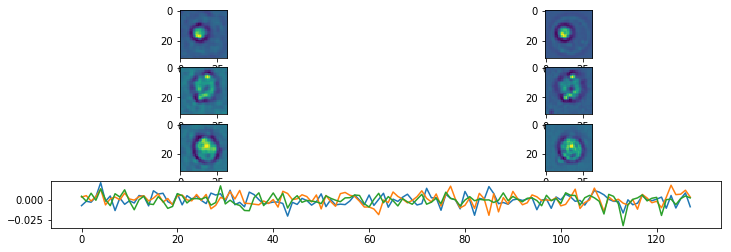

Epoch:  17 Iteration:  0 Loss:  0.62429595 0.54679924 0.07749668


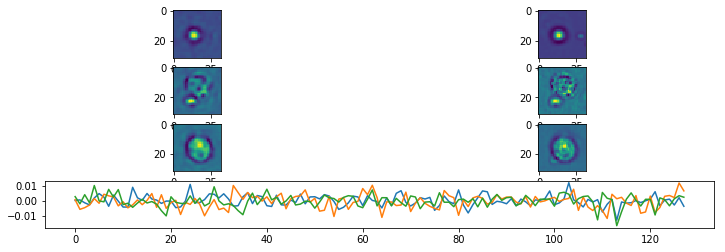

Epoch:  17 Iteration:  1000 Loss:  0.54704446 0.4904472 0.056597285


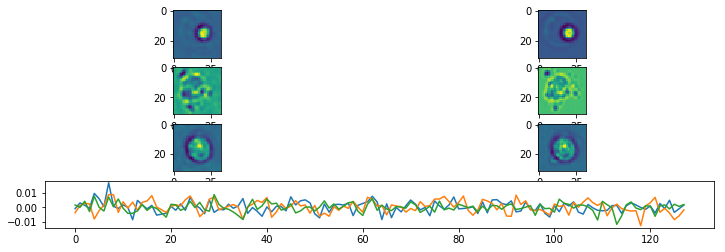

Epoch:  18 Iteration:  0 Loss:  0.56497866 0.5108821 0.054096606


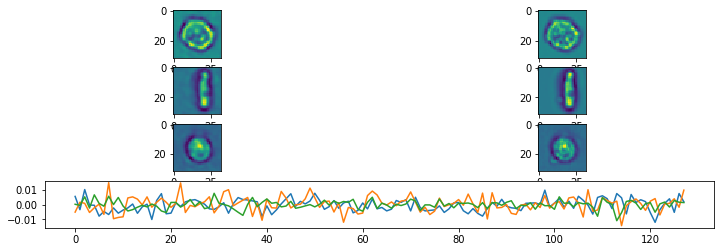

Epoch:  18 Iteration:  1000 Loss:  0.5377459 0.4898796 0.047866307


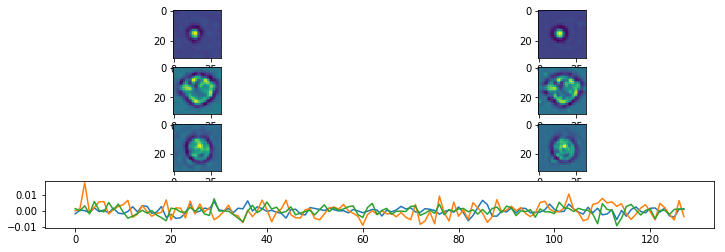

Epoch:  19 Iteration:  0 Loss:  0.54503334 0.49703473 0.047998637


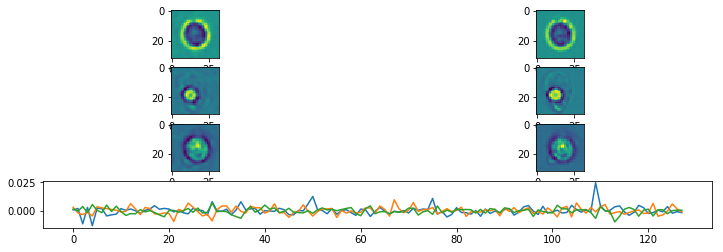

Epoch:  19 Iteration:  1000 Loss:  0.5148207 0.47098497 0.04383576


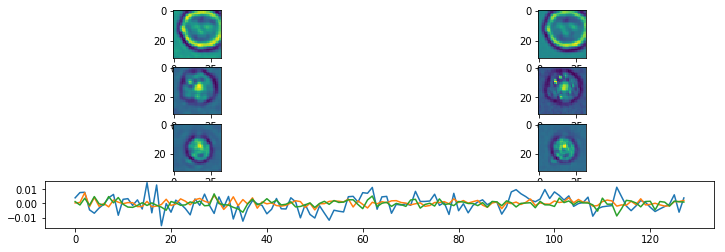

Epoch:  20 Iteration:  0 Loss:  0.53170484 0.48698646 0.044718366


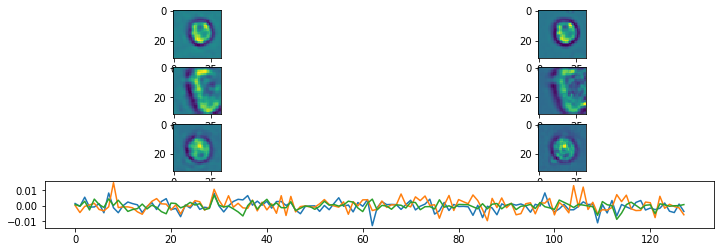

Epoch:  20 Iteration:  1000 Loss:  0.6436386 0.5486001 0.0950385


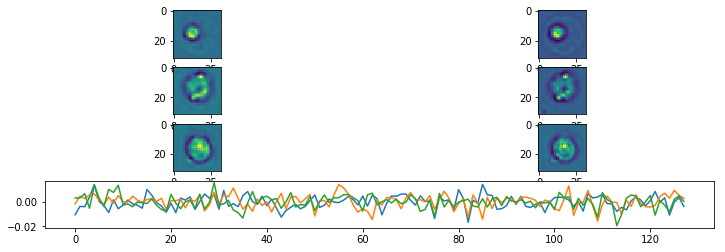

Epoch:  21 Iteration:  0 Loss:  0.58934194 0.51571774 0.07362418


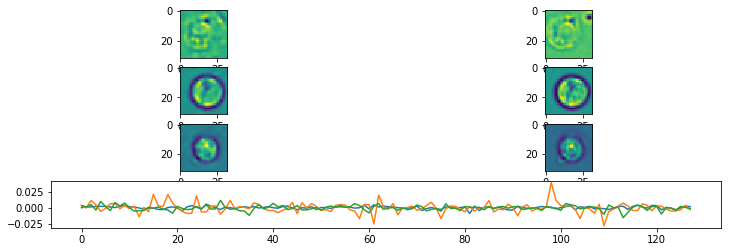

Epoch:  21 Iteration:  1000 Loss:  0.5243744 0.47077167 0.053602736


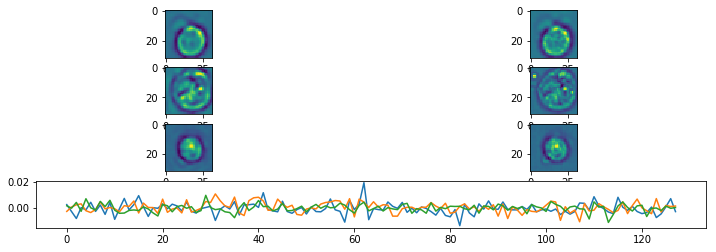

Epoch:  22 Iteration:  0 Loss:  0.5361122 0.48395753 0.05215463


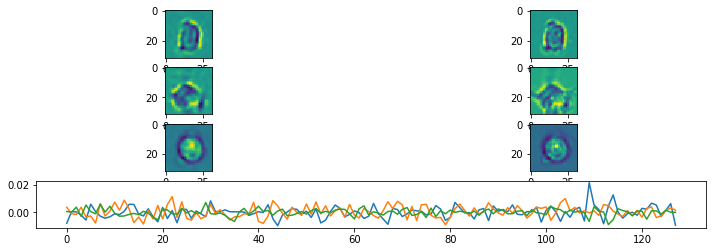

Epoch:  22 Iteration:  1000 Loss:  0.5038649 0.45821327 0.045651615


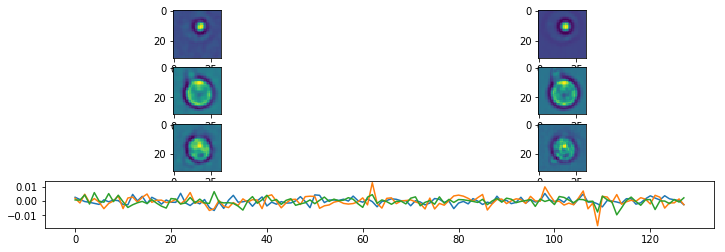

Epoch:  23 Iteration:  0 Loss:  0.52244 0.47724998 0.04519005


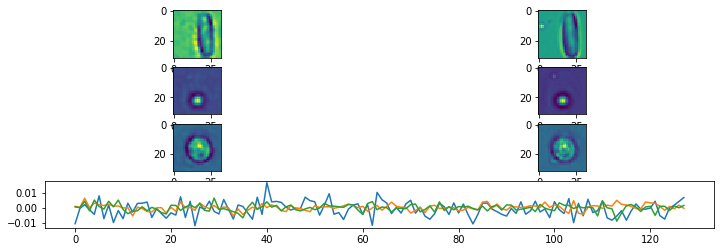

Epoch:  23 Iteration:  1000 Loss:  0.49039027 0.44808498 0.042305283


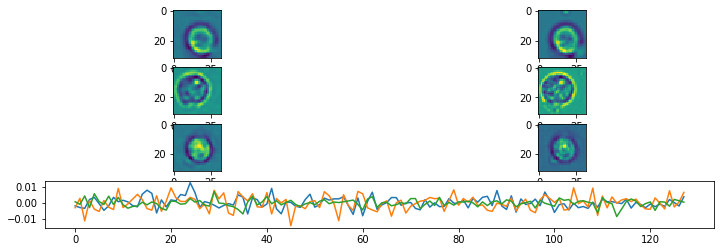

Epoch:  24 Iteration:  0 Loss:  0.50270116 0.46055695 0.042144205


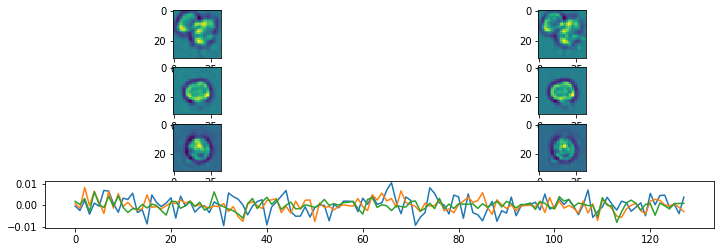

Epoch:  24 Iteration:  1000 Loss:  0.89198726 0.77545375 0.11653353


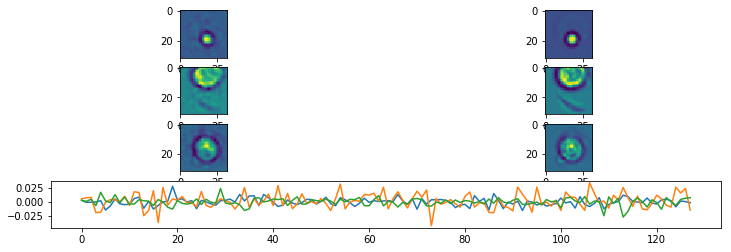

Epoch:  25 Iteration:  0 Loss:  0.58334494 0.5128651 0.07047984


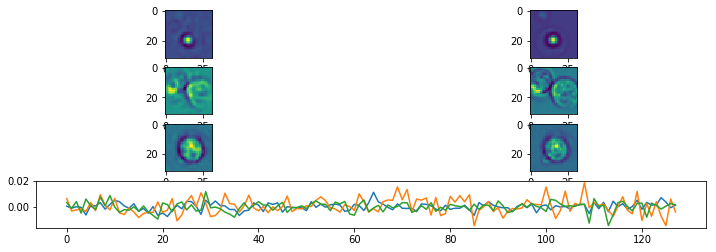

Epoch:  25 Iteration:  1000 Loss:  0.50008357 0.4490316 0.051052004


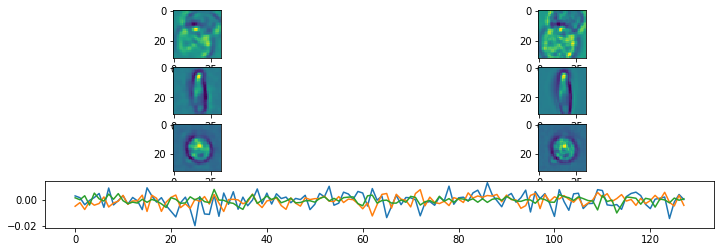

Epoch:  26 Iteration:  0 Loss:  0.51267904 0.4645434 0.048135646


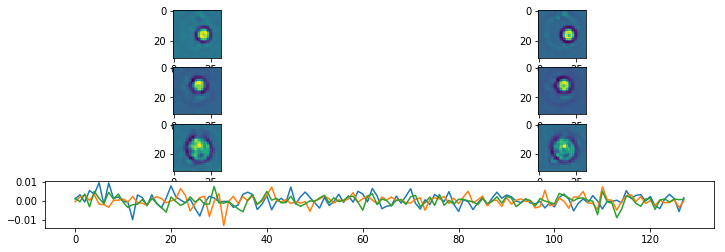

Epoch:  26 Iteration:  1000 Loss:  0.47655782 0.43440634 0.04215148


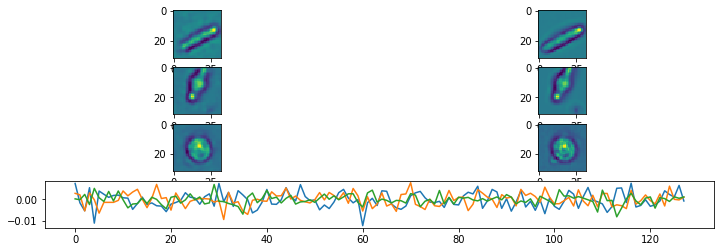

Epoch:  27 Iteration:  0 Loss:  0.49392483 0.45195013 0.041974697


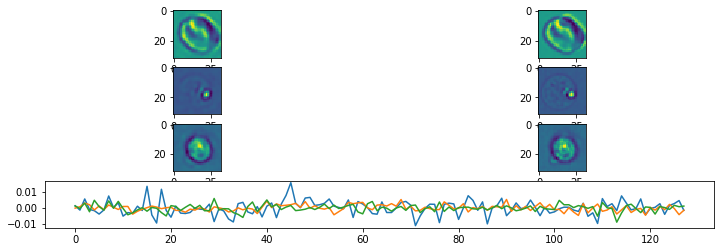

Epoch:  27 Iteration:  1000 Loss:  0.46465757 0.42580074 0.03885684


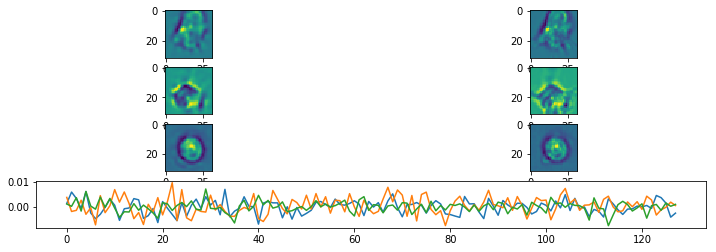

Epoch:  28 Iteration:  0 Loss:  0.48882174 0.4500573 0.038764443


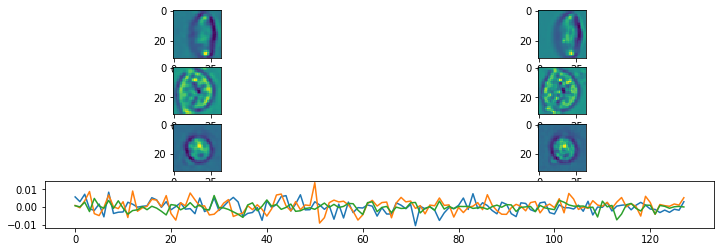

Epoch:  28 Iteration:  1000 Loss:  0.63675004 0.5407738 0.09597622


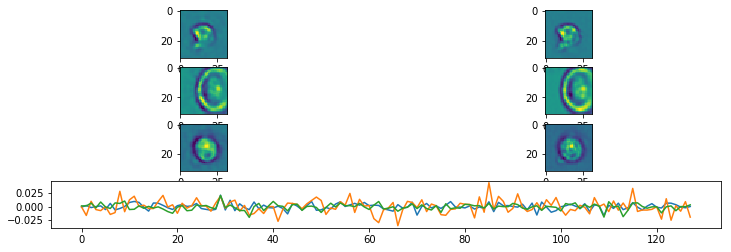

Epoch:  29 Iteration:  0 Loss:  0.5506957 0.47964343 0.07105228


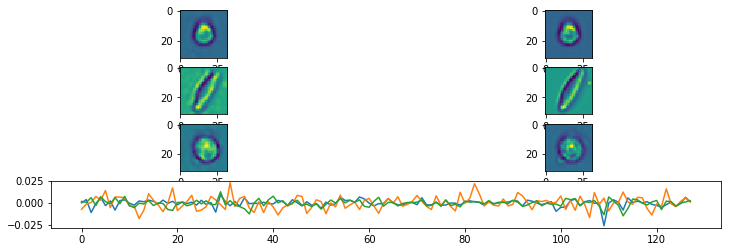

Epoch:  29 Iteration:  1000 Loss:  0.47980565 0.4288361 0.050969552


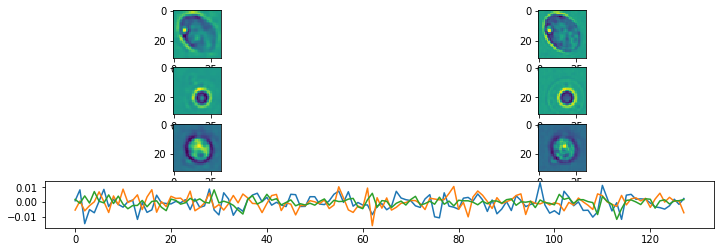

Epoch:  30 Iteration:  0 Loss:  0.4928379 0.44384673 0.048991166


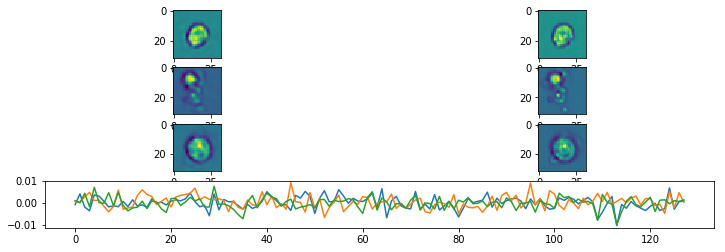

Epoch:  30 Iteration:  1000 Loss:  0.46246824 0.4198795 0.04258875


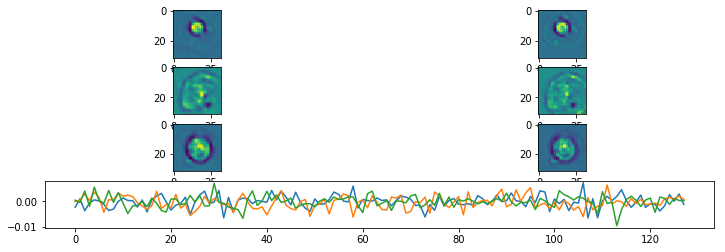

Epoch:  31 Iteration:  0 Loss:  0.48361158 0.44146413 0.04214745


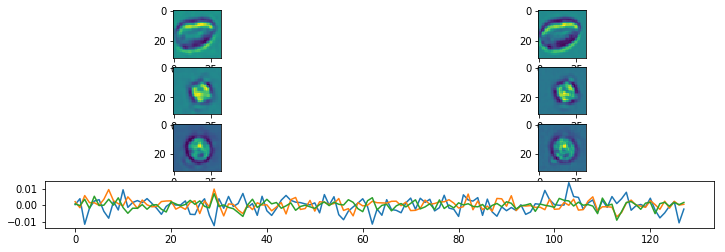

Epoch:  31 Iteration:  1000 Loss:  0.45652542 0.41702467 0.039500743


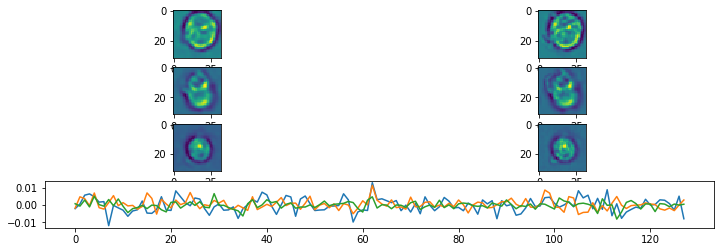

Epoch:  32 Iteration:  0 Loss:  0.4757625 0.43695745 0.03880504


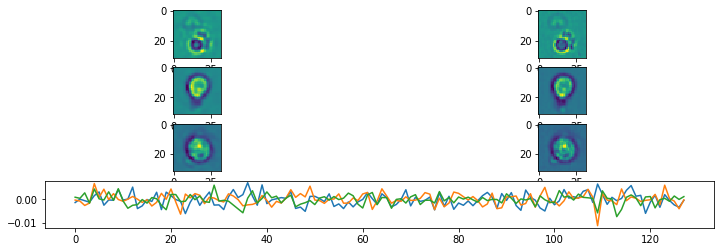

Epoch:  32 Iteration:  1000 Loss:  0.44785762 0.41112417 0.036733434


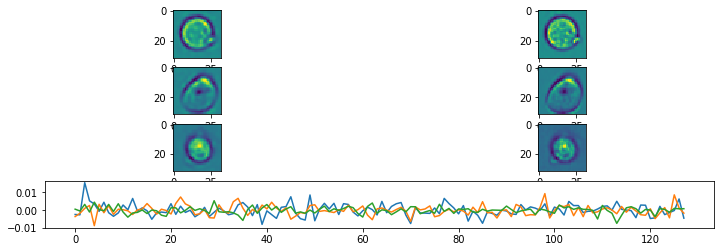

Epoch:  33 Iteration:  0 Loss:  0.8043111 0.69335043 0.110960655


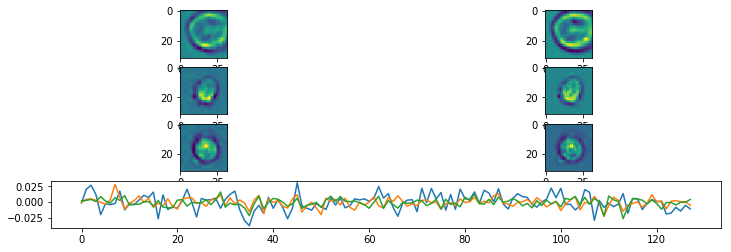

Epoch:  33 Iteration:  1000 Loss:  0.47005025 0.41939056 0.050659686


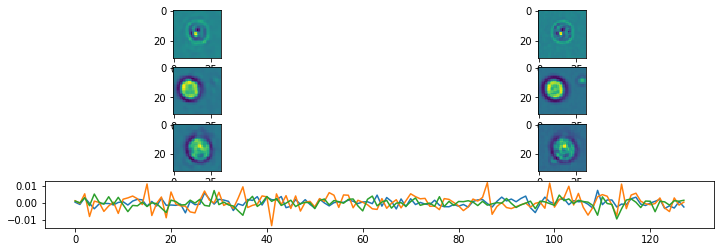

Epoch:  34 Iteration:  0 Loss:  0.48431453 0.43710697 0.047207575


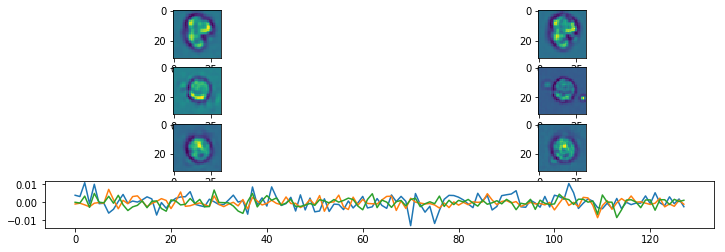

Epoch:  34 Iteration:  1000 Loss:  0.44697767 0.40662235 0.040355317


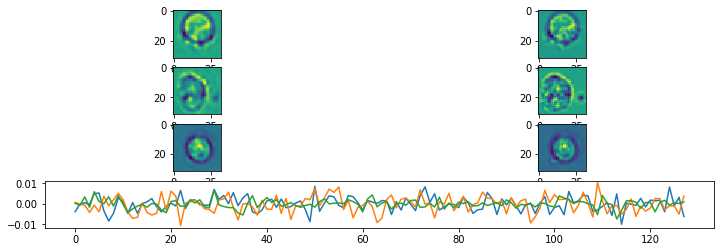

Epoch:  35 Iteration:  0 Loss:  0.47080988 0.43022007 0.040589795


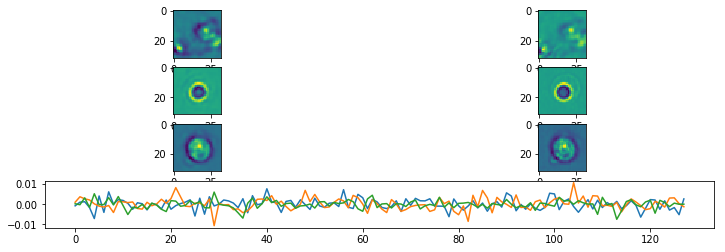

Epoch:  35 Iteration:  1000 Loss:  0.4421724 0.4050633 0.037109118


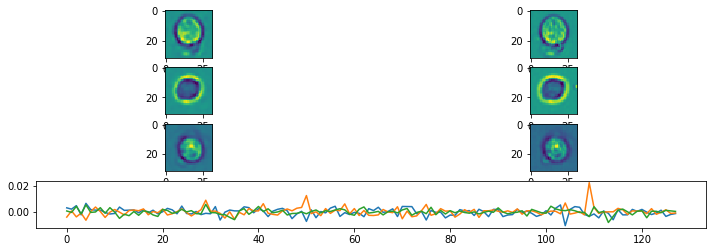

Epoch:  36 Iteration:  0 Loss:  0.46182588 0.4248351 0.036990788


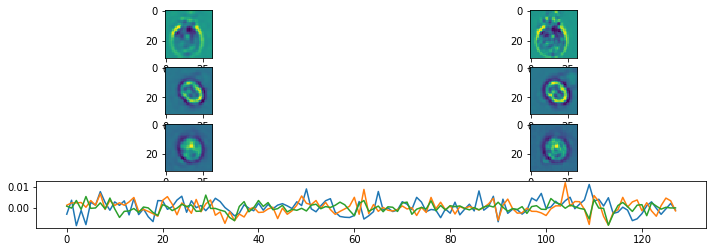

Epoch:  36 Iteration:  1000 Loss:  0.4591583 0.40979582 0.049362473


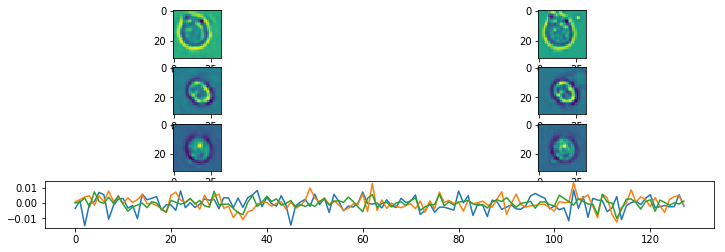

Epoch:  37 Iteration:  0 Loss:  0.46391147 0.41951096 0.04440052


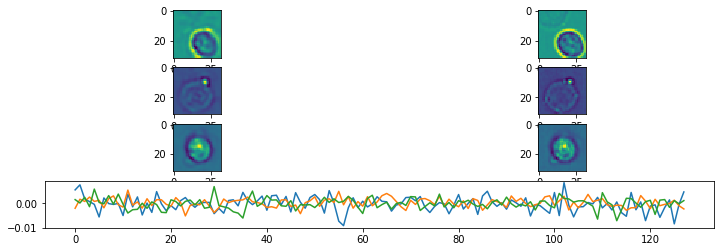

Epoch:  37 Iteration:  1000 Loss:  0.43290773 0.39425555 0.038652193


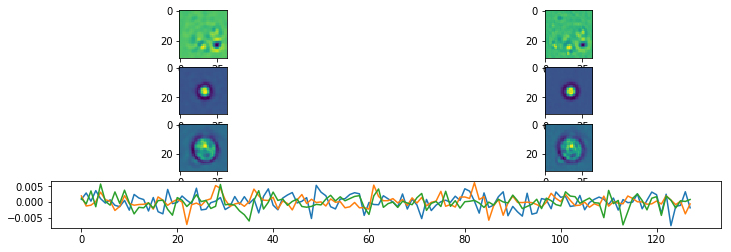

Epoch:  38 Iteration:  0 Loss:  0.4537326 0.41562295 0.038109675


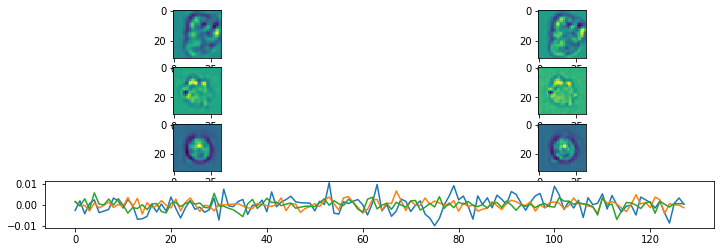

Epoch:  38 Iteration:  1000 Loss:  0.42912257 0.39336097 0.035761602


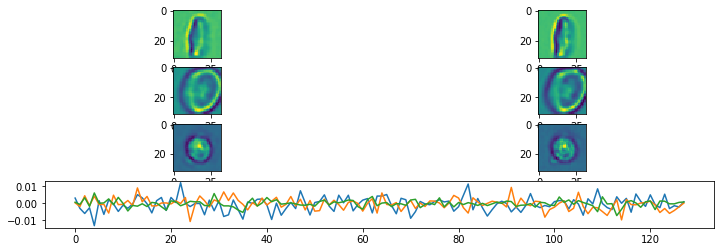

Epoch:  39 Iteration:  0 Loss:  0.45111874 0.41570923 0.035409503


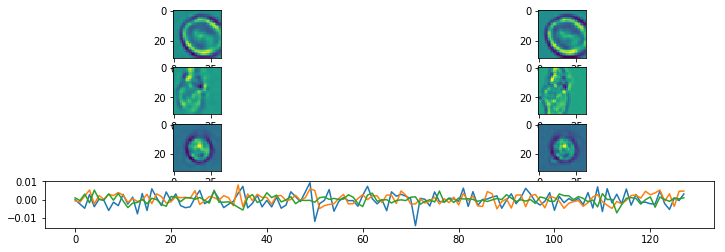

Epoch:  39 Iteration:  1000 Loss:  0.5327696 0.46216327 0.07060636


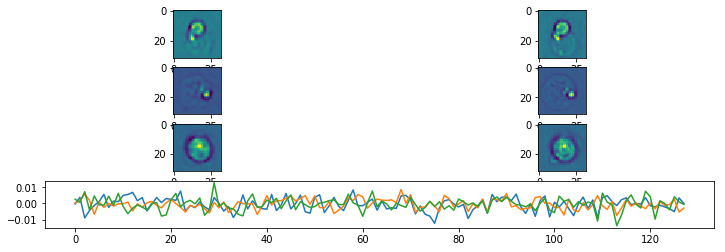

Done


In [6]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 1
p_channels = [0]
p_nepochs = 40
p_batchsize = 128
p_learning_rate = 0.0001  #.00005
p_restore = False
p_latent_size = 128 #128 + 64
p_droprate = 0.85
p_stdev = .04
p_slam = .001
p_denoise = None
enc_sizes = [(128, 3), (256, 3), (512, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev
params['slam'] = p_slam
params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes
params['denoise'] = p_denoise
cpdir = "/media/cjw/Data/cyto/Checkpoints/2018-05-31-Sparse_Channel_1_128"

if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_train.train(p_mmdict, p_df, params, 1000, cpdir)

In [ ]:
x = 4
x